# Conditional Agent

In [5]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from pprint import pprint

In [6]:
class AgentState(TypedDict):
    number1 : int
    number2 : int
    operator : str
    result : int

In [8]:
def adder(state: AgentState) -> AgentState:
    """ This function adds 2 numbers """

    state["result"] = state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    """ This function subtracts 2 numbers """

    state["result"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState) -> str:
    """ This node will select the next node of the graph """

    if state["operator"] == "+":
        return "addition_operation"
    elif state["operator"] == "-":
        return "subtraction_operation"

In [10]:
graph = StateGraph(AgentState)

graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "addition_operation": "adder",
        "subtraction_operation": "subtractor"
    }
)

graph.add_edge("adder", END)
graph.add_edge("subtractor", END)

app = graph.compile()

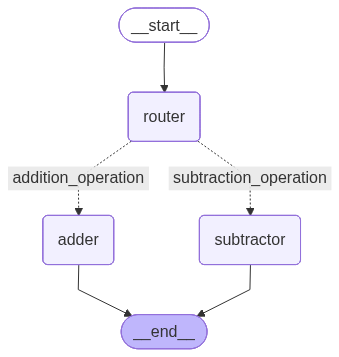

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
initial_state_1 = AgentState(number1 = 10, operator = "+", number2 = 5)
pprint(app.invoke(initial_state_1))

{'number1': 10, 'number2': 5, 'operator': '+', 'result': 15}


In [13]:
initial_state_2 = AgentState(number1 = 10, operator = "-", number2 = 5)
pprint(app.invoke(initial_state_2))

{'number1': 10, 'number2': 5, 'operator': '-', 'result': 5}
